## Logistic Regresion 

This notebook is created to solve Logistic Regresion using python

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.
Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams. This outline
and the framework code in ex2.m will guide you through the exercise.

 We start the exercise by first plotting the data to understand the problem we are working with.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.optimize import fmin_tnc

In [2]:
data = pd.read_csv('ex2data1.txt')
data

,exam_1,exam_2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


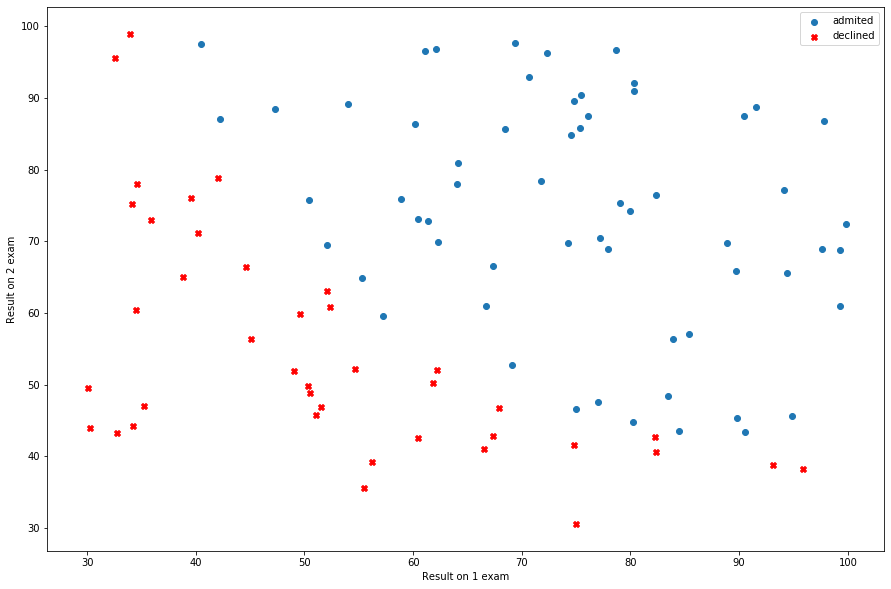

In [3]:
admited = data[data.admission == 1]
declined = data[data.admission == 0]

plt.figure(figsize=(15,10))
plt.scatter(admited.exam_1,admited.exam_2,marker='o')
plt.scatter(declined.exam_1,declined.exam_2,marker='X',color='red')
plt.xlabel("Result on 1 exam")
plt.ylabel("Result on 2 exam")
plt.legend(["admited","declined"])
plt.show()

Now lets split our data to training and test data

In [4]:

# Our dataset consists of 100 data points. So splitting it on a 70:30 ratio. 

# First 70 Data points for Training
data_train = data.iloc[:70,:]

#Last 30 for Testing
data_test = data.iloc[70:,:]

Logistic regression hypothesis is defined as:

$ h_θ (x) = g(θ^T x), $

where function g is the sigmoid function. The sigmoid function is defined as:

$ g(z) =\frac{1}{(1 + e^{−z})} $


Lets implement this function




In [5]:

def sigmoid(x):
    return 1/(1+np.exp(-x))


Now lets define gradient and cost functions

cost function in logistic regression is

$ J(θ) = \frac{1}{m} \sum_{i=1}^{m}[−y^{i}log(h_θ (x^i)) − (1 − y^i ) log(1 − h_θ (x^i ))]$

and the gradient of the cost is a vector of the same length as $θ$ where the j th
element (for j = 0, 1, . . . , n) is defined as follows:


$ \frac{∂J(θ)}{∂θ_j} \sum_{i=1}^{m} \frac{1}{m}(h_θ(x^i) − y^i )x_j^i$



In [6]:
# #  Setup the data matrix appropriately, and add ones for the intercept term
X, y = data_train.iloc[:,:-1], data_train.admission
m, n = data_train.shape

# Add intercept term to X
X = np.concatenate((np.ones((m, 1)), X), axis=1)


# Initialize fitting parameters
initial_theta = np.zeros(n)

def cost_function(theta, X, y):

    m = y.size  # number of training examples
    h = sigmoid(np.dot( X,theta.T))
    
    a = np.multiply(y , np.log(h))
    b = np.multiply((1 - y) , np.log(1 - h))

    J = -1 *(1./m ) * ((a+b).sum())
    
    return J

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(np.dot(x, theta)) - y)

In [7]:
print("")
print(f"Cost at initial theta (vector of zeros) = {cost_function(initial_theta, X, y)}")


Cost at initial theta (vector of zeros) = 0.6931471805599454


Now it is time to optimize our theta parameters

In [8]:
# optimize theta using scipy minimize
opt = fmin_tnc(func=cost_function, x0=initial_theta,
                  fprime=gradient,args=(X, y))

In [9]:
theta=opt[0]

In [10]:
print(f'theta: {theta}')

theta: [-24.81893342   0.20851311   0.18648929]


In [11]:
cost_function(theta, X, y)

0.20258644346894986

Now lets plot our decision boundry

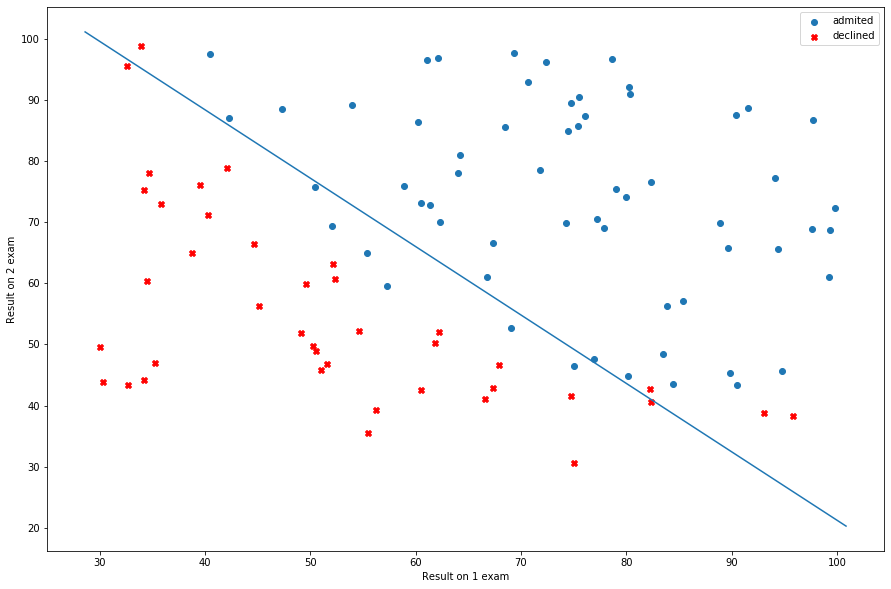

In [12]:
admited = data[data.admission == 1]
declined = data[data.admission == 0]

plt.figure(figsize=(15,10))
plt.scatter(admited.exam_1,admited.exam_2,marker='o')
plt.scatter(declined.exam_1,declined.exam_2,marker='X',color='red')
plt.xlabel("Result on 1 exam")
plt.ylabel("Result on 2 exam")
plt.legend(["admited","declined","decision boundry"])

plot_X = np.array([np.amin(data.iloc[:, 1]) - 2, np.amax(data.iloc[:, 1]) + 2])
plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
plt.plot(plot_X, plot_y)




plt.show()

Now we can actualy use our parameters to predict wheter student will be admited

In [13]:
def predict(x):
    return sigmoid(np.dot(x, theta))
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

data_test = data_test.iloc[:,:-1]
m, n = data_test.shape

data_test = np.concatenate((np.ones((m, 1)), data_test), axis=1)


acc = accuracy(data_test,data.admission )
print(f"Accuraccy of our model is: {acc}%")

/home/dominik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


ValueError: Lengths must match to compare

In [14]:
predict(data)

array([[ 1.        , 32.72283304, 43.30717306],
       [ 1.        , 64.03932042, 78.03168802],
       [ 1.        , 72.34649423, 96.22759297],
       [ 1.        , 60.45788574, 73.0949981 ],
       [ 1.        , 58.84095622, 75.85844831],
       [ 1.        , 99.8278578 , 72.36925193],
       [ 1.        , 47.26426911, 88.475865  ],
       [ 1.        , 50.4581598 , 75.80985953],
       [ 1.        , 60.45555629, 42.50840944],
       [ 1.        , 82.22666158, 42.71987854],
       [ 1.        , 88.91389642, 69.8037889 ],
       [ 1.        , 94.83450672, 45.6943068 ],
       [ 1.        , 67.31925747, 66.58935318],
       [ 1.        , 57.23870632, 59.51428198],
       [ 1.        , 80.366756  , 90.9601479 ],
       [ 1.        , 68.46852179, 85.5943071 ],
       [ 1.        , 42.07545454, 78.844786  ],
       [ 1.        , 75.47770201, 90.424539  ],
       [ 1.        , 78.63542435, 96.64742717],
       [ 1.        , 52.34800399, 60.76950526],
       [ 1.        , 94.09433113, 77.159